# Appliances with occasional use

There are some appliances that are occasionally included in the mix pf appliances that the user switches-on during the day. For example, iron, stereo, printers and ...

Within ramp, the user may specify the probability of using an appliance on the daily mix with a parameter called, **occasional_use**.

When occasional_use = 0, the appliance is always present in the mix and when occasional_use = 1, the appliance is never present.

The following example, investigates the effect of this parameter by modelling two user category:
* A household that uses a computer with ocationally
* A school that uses the computer everyday

In [1]:
# importing functions
from ramp import User,calc_peak_time_range,yearly_pattern
import pandas as pd

### Creating a user category and appliances

In [2]:
household = User("Household")
school = User("School")

In [3]:
computer_0 = household.Appliance(
    name = "Household Computer",
    number = 1,
    power  = 50,
    num_windows = 1,
    func_time = 210,
    occasional_use = 0.5  # 50% chance of occasional use
)

computer_0.windows(
    window_1 = [510,750],
)


In [4]:
computer_1 = school.Appliance(
    name = "School Computer",
    number = 1,
    power  = 50,
    num_windows = 1,
    func_time = 210,
    time_fraction_random_variability = 0.2,
    func_cycle = 10,
    occasional_use = 1 # always present in the mix of appliances
)

computer_1.windows(
    window_1 = [510,750],
)


<AxesSubplot:>

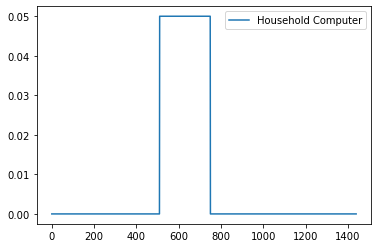

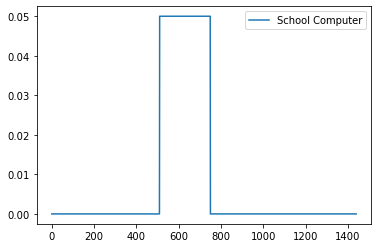

In [5]:
# Checking the maximum profile of the two appliances

max_profile_c1 = pd.DataFrame(computer_0.maximum_profile,columns=[computer_0.name])
max_profile_c2 = pd.DataFrame(computer_1.maximum_profile,columns=[computer_1.name])

max_profile_c1.plot()
max_profile_c2.plot()

### Generating profiles

In [6]:
peak_time_range = calc_peak_time_range(
    user_list = [household,school]
)
year_behaviour = yearly_pattern()

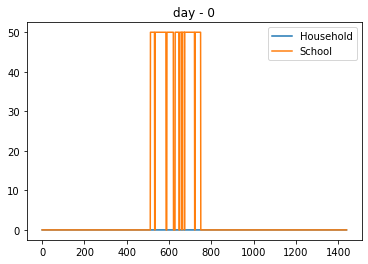

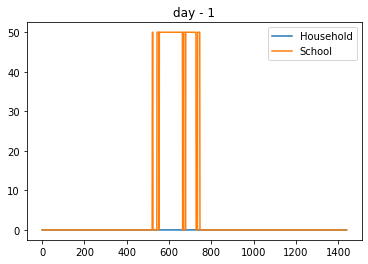

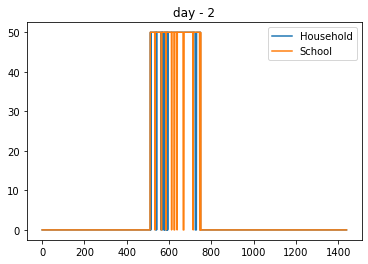

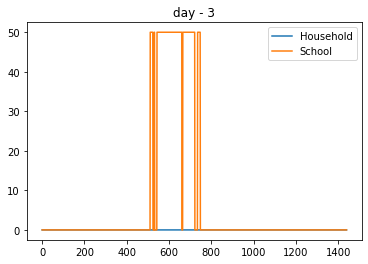

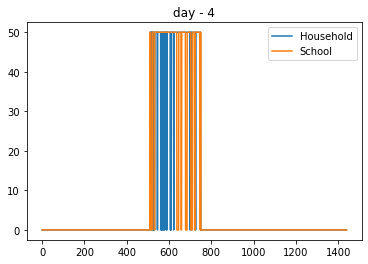

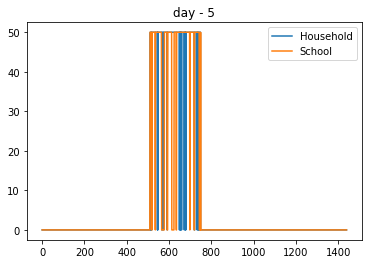

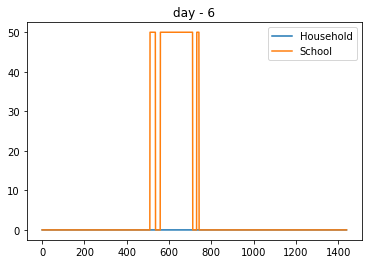

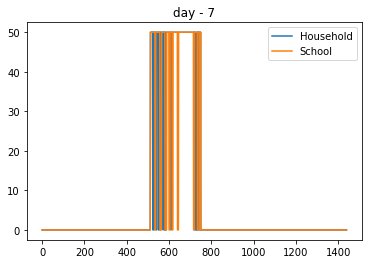

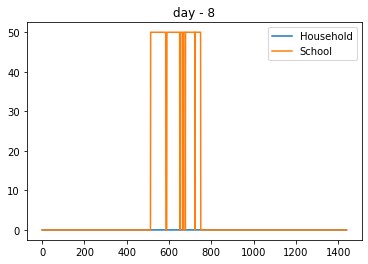

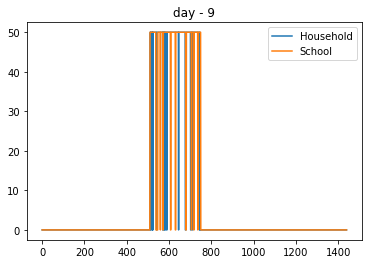

In [7]:
# plotting profiles for 5 days
days = range(10)

for day in days:
    household_profile = household.generate_single_load_profile(
        prof_i = day, 
        peak_time_range = peak_time_range,
        Year_behaviour = year_behaviour
    )
    
    school_profile = school.generate_single_load_profile(
        prof_i = day, 
        peak_time_range = peak_time_range,
        Year_behaviour = year_behaviour
    )
    
    pd.DataFrame(
        data = [household_profile,school_profile],
        columns = range(1440),
        index = [household.user_name,school.user_name]
    ).T.plot(title=f"day - {day}")
    
    

As it can be seen from the figures, the computer is always present in the school appliance mix while for household, is occasionally present.